# Versuch 4: Statistik II  (Dart & Abschlussfeier)

In [2]:
# Name: Wafaa Al Nachwati
# Matrikelnummer: 8102530
# Emailadresse:
# Studiengang: Physik
# Wiederholen Sie das Praktikum (Ja/Nein)? Nein

# Name: Finn Jannik Wagner
# Matrikelnummer: 8102237
# Emailadresse: finn.jannik.wagner@physik.uni-giessen.de
# Studiengang: Physik
# Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen beantworten. Speichern Sie dieses Notebook als PDF ab. Es stellt Ihr Versuchsprotokoll dar.

# Aufgabenstellungen:
## Dart
Ein Spieler wirft Dartpfeile auf eine quadratische Fläche.<br>
<br>
a) Führen Sie mit Hilfe der Funktion mc_sim(n, r = 1, func = "pi", norm = False, save = "example") eine Monte-Carlo Simulation zur Bestimmung der Kreiszahl $\large{\pi}$ durch. Benutzen Sie dabei i) $n=100$ und ii) $n=1000$ iii) $n=10000$ zufallsgenerierte Punkte. Vergleichen Sie die Werte mit einem aktuellen Literaturwert. <br>
<br> 
b) Welche Annahme muss für den Dartspieler gelten, damit die Simulation ein verlässliches Ergebnis liefert? <br>
<br>
c) Nun kommt ein weiterer Spieler hinzu. Um dies darzustellen, werden für die Simulation normalverteilte Datenpunkte (grün) generiert (benutzen Sie dafür bei der Funktion mc_sim() das Argument "norm = [0, 0.1]"). Welchem Sachverhalt entspricht diese Simulation?  Könnte $\large{\pi}$ nur aus den Ergebnissen dieses Spielers berechnet werden? <br>
<br>
d) Führen Sie mit Hilfe der Funktion mc_sim(n = 10000, func = "gauss", norm = False, save = "example") eine Monte-Carlo Simulation zur Bestimmung des Flächeninhalts der Funktion $f(x)=e^{-\frac{x^2}{2}}$ im Intervall $[-10,10]$ durch. Benutzen Sie dafür i) $n=100$ und ii) $n=1000$ und iii) $n=10000$ zufallsgenerierte Punkte. Vergleichen Sie die Werte mit dem Literaturwert. Gehen Sie hierfür davon aus, dass näherungsweise die Fläche über das Intervall $(- \infty, \infty)$ betrachtet wird. <br>
<br>
e) Überlegen Sie sich, wie man $\large{\pi}$ berechnen kann, wenn man den Flächeninhalt aus (d) vorliegen hat. Vergleichen Sie den so erhaltenen Wert für  $\large{\pi}$  mit einem Literaturwert. Was passiert, wenn man die Intervallgrenzen der Monte-Carlo-Integration ändert? Wie kann man die Ergebnisse erklären?

## Abschlussfeier
f) Auf der Abschlussfeier der Physik einer sehr großen Universität soll ein Walzer getanzt werden. Die "Herrenschritte" beherrschen 100 StudentInnen (kurz bezeichnen wir diese vereinfacht als "Herren"). Die "Damenschritte" hingegen beherrschen 1000 StudentInnen (kurz bezeichnen wir diese als "Damen"). <br><br>
Gehen wir davon aus, dass aufgrund des Überangebots an Damen nur die Herren mit verschiedenen Damen tanzen, die Damen aber am Tisch sitzen bleiben und am ganzen Abend nur mit einem Herr tanzen. Nun kann es also dazu kommen, dass einige Damen keinen Partner finden und manche Herren sogar von mehreren Damen gefragt werden, ob sie zusammen tanzen wollen. Betrachten wir nun also die Personen, welche die Herrenschritte beherrschen und ordnen Ihnen Damen zu. Dies kann wie folgt aussehen: 

    - Person 1: eine Dame als Partner*in
    - Person 2: - 
    - Person 3: 10 Damen als Partner*innen
    - ...
    - Person 100: 5 Damen als Partner*innen


Wir simulieren dies mit einem Modell.

Benutzen Sie dazu die Funktion mc\_sim(n, r, func = "grid", norm = False, save = "example"). Dadurch wird ein  $r*r$  Gitter ("Schachbrett") erstellt wird. Dabei wird jedes der  $r*r$ Felder zufällig mit Punkten (Damen) gefüllt. Dann wird die Anzahl der Punkten (Damen) pro Feld (Herr) gezählt und in einem Histogramm geplottet. 

Wir können natürlich beliebige Feiergrößen betrachten. 
Verwenden Sie <br>
i) $n=1000$ & $r=10$  und <br> 
ii) $n=25000$ & $r=50$,<br>
iii) $n=100000$ & $r=100$ <br>
Dabei bezeichnet n die Anzahl an Damen, welche mit einem Herr tanzen möchten. Welche Bedeutung hat r in Bezug auf die Aufgabe?

Vergleichen Sie (optisch) die erhaltenen Werte mit den theoretischen Werten. Welcher Verteilung entspricht das resultierende Histogramm der experimentellen Werte? Welcher Verteilung entspricht das resultierende Histogramm der theoretischen Werte? Geben Sie die jeweiligen Parameter der Wahrscheinlichkeitsverteilung an (z.B. "p" oder "a" in den Formeln in der Anleitung). 

ACHTUNG: Die Berechnung der Werte kann, je nach Hardware, durchaus einige Minuten dauern! Bitte kontaktieren Sie uns, sollten Sie einen "Runtime Error" erhalten)

g) Nutzen Sie die Ergebnisse aus Aufgabe (f). Wie groß ist die Wahrscheinlichkeit, dass drei Damen mit einem Herr tanzen möchten? Diese Werte werden als Zahlenreihe unter den Histogrammen ausgegeben. Lesen Sie die richtigen Werte ab. Vergleichen Sie diese Werte mit dem theoretischen Wert für $ P(\lambda ,k)=\frac{\lambda ^k}{k!}e^{-\lambda}$. Was fällt Ihnen auf?




In [2]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import math
from scipy.special import factorial as fak

In [3]:
def mc_sim(n, r, func, norm = False, save = False): 
    """
    n = Anzahl der Dartwürfe (Integer)
    
    r = Radius des Kreises (Aufgabe a) ),                    (Integer)
        bzw. Intervall [-r, r] des Integrals (Aufgabe d) ),  (Integer)
        bzw. rxr Schachbrettmuster (Aufgabe e) ),            (Integer)

    func = "pi" (approximiert Pi und gibt "Dartplot" aus),
           "gauss" (approximiert Fläche unter der Gausskurve und gibt "Dartplot" aus),
           "grid" (plottet Verteilung der Anzahl der Events pro Feld gegen theoretische Verteilung)
    
    """
    x_in = np.array([])
    y_in = np.array([])
    
    if (func == "pi"):
        x = [rnd.uniform(-r,r)for i in range(n)]
        y = [rnd.uniform(-r,r)for i in range(n)]
      
        for i in range(n):
            if np.sqrt(x[i]**2+y[i]**2)<=r:
                x_in = np.append(x_in, x[i])
                y_in = np.append(y_in, y[i])
                
    elif (func == "gauss"):
        x = [rnd.uniform(-r,r)for i in range(n)]
        y = [rnd.uniform(0,1)for i in range(n)]
       
        f = np.exp(-(np.array(x)**2 /2) )
        for i in range (n):
            if ((y[i] <= 0) and (y[i] >= f[i])):
                x_in = np.append(x_in, x[i])
                y_in = np.append(y_in, y[i])
            elif ((y[i] >= 0) and (y[i] <= f[i])):
                x_in = np.append(x_in, x[i])
                y_in = np.append(y_in, y[i])
                
    elif (func == "grid"):
        x = np.array([rnd.uniform(0,1)for i in range(n)])
        y = np.array([rnd.uniform(0,1)for i in range(n)])
        points = np.array([])
        for i in range (r):
            for j in range (r):
                check1 = ( (x >= j /r) & (x < (j+1) /r) )
                check2 = ( (y[check1] >= i /r) & ( y[check1] < (i+1) /r) )
                points = np.append(points, sum(check2) )
                real_dist = np.array([4.53999298e-05, 4.53999298e-04, 2.26999649e-03, 7.56665496e-03, 1.89166374e-02, 3.78332748e-02, 6.30554580e-02, 9.00792257e-02,1.12599032e-01, 1.25110036e-01, 1.25110036e-01, 1.13736396e-01,9.47803301e-02, 7.29079462e-02, 5.20771044e-02, 3.47180696e-02,2.16987935e-02, 1.27639962e-02, 7.09110899e-03, 3.73216263e-03,1.86608131e-03, 8.88610150e-04, 4.03913704e-04, 1.75614654e-04,7.31727725e-05, 2.92691090e-05, 1.12573496e-05, 4.16938875e-06,1.48906741e-06, 5.13471521e-07])

        amount=plt.hist(points, bins = np.arange(31), density = True, color = "limegreen", label = "experimentelle Werte")
        plt.bar(np.arange(30),real_dist, color = "black", width = 0.4, label = "theoretische Werte")
        plt.legend()
        plt.show()
        
    if (func != "grid"):    
        area = len(x_in)/len(x)
        plt.scatter(x, y)
        plt.scatter(x_in, y_in)
    
        if (norm != False):
            plt.scatter([rnd.normal(norm[0], norm[1])for i in range(n)], [rnd.normal(norm[0], norm[1])for i in range(n)])
        plt.show()

        if (func == "pi"):
            print(4*area)
            return 4*area

        elif (func == "gauss"):
            print(2*r*area)
            return 2*r*area

    elif (func == "grid"):
        print("Häufigkeitswerte (y-Werte des Histogramms): ", amount[0])
        return amount


# Dart

# Aufgabe a)

Drei Monte-Carlo-Simulationen zur Bestimmung von π mit 100 Zufallsstichproben


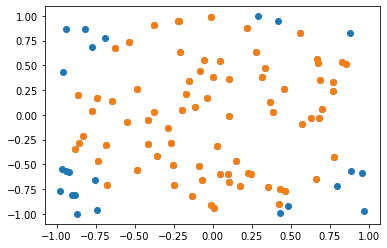

3.08


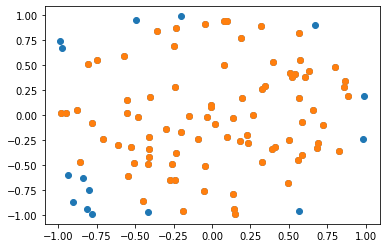

3.4


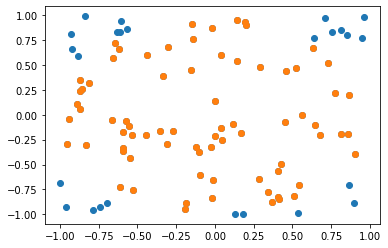

3.0
Drei Monte-Carlo-Simulationen zur Bestimmung von π mit 1000 Zufallsstichproben


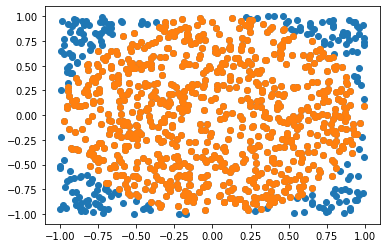

3.12


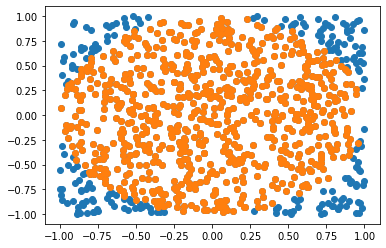

3.144


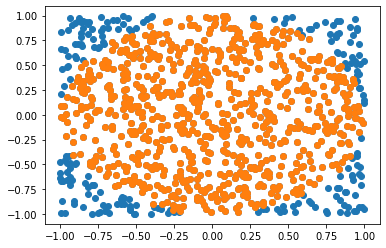

3.144
Drei Monte-Carlo-Simulationen zur Bestimmung von π mit 10000 Zufallsstichproben


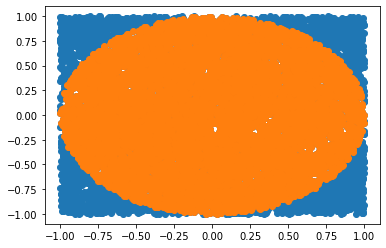

3.1356


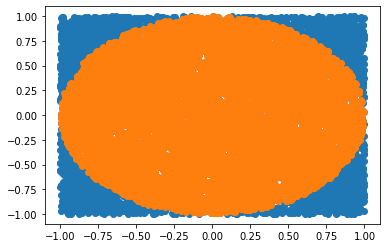

3.1404


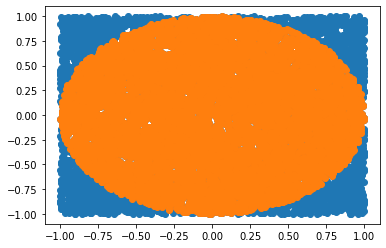

3.1448
Ergebnisse:
Die experimentellen Werte für 100 Zufallsstichproben: 3.08, 3.4 und 3.0
Die experimentellen Werte für 1000 Zufallsstichproben: 3.12, 3.144 und 3.144
Die experimentellen Werte für 10000 Zufallsstichproben: 3.1356, 3.1404 und 3.1448


In [5]:
# i)
print(f'Drei Monte-Carlo-Simulationen zur Bestimmung von π mit {100} Zufallsstichproben')
ergebnis1_1 = mc_sim(n = 100, r = 1, func = "pi", norm = False)
ergebnis1_2 = mc_sim(n = 100, r = 1, func = "pi", norm = False)
ergebnis1_3 = mc_sim(n = 100, r = 1, func = "pi", norm = False)

# ii)
print(f'Drei Monte-Carlo-Simulationen zur Bestimmung von π mit {1000} Zufallsstichproben')
ergebnis2_1 = mc_sim(n = 1000, r = 1, func = "pi", norm = False)
ergebnis2_2 = mc_sim(n = 1000, r = 1, func = "pi", norm = False)
ergebnis2_3 = mc_sim(n = 1000, r = 1, func = "pi", norm = False)

# iii)
print(f'Drei Monte-Carlo-Simulationen zur Bestimmung von π mit {10000} Zufallsstichproben')
ergebnis3_1 = mc_sim(n = 10000, r = 1, func = "pi", norm = False)
ergebnis3_2 = mc_sim(n = 10000, r = 1, func = "pi", norm = False)
ergebnis3_3 = mc_sim(n = 10000, r = 1, func = "pi", norm = False)

print('Ergebnisse:')
print(f'Die experimentellen Werte für {100} Zufallsstichproben: {ergebnis1_1}, {ergebnis1_2} und {ergebnis1_3}')
print(f'Die experimentellen Werte für {1000} Zufallsstichproben: {ergebnis2_1}, {ergebnis2_2} und {ergebnis2_3}')
print(f'Die experimentellen Werte für {10000} Zufallsstichproben: {ergebnis3_1}, {ergebnis3_2} und {ergebnis3_3}')

In [6]:
# Berechnen der Mittelwerte für die drei Experimente mit gleicher Stichprobenzahl
mw_1 = ( ergebnis1_1 + ergebnis1_2 + ergebnis1_3 )/3
mw_2 = ( ergebnis2_1 + ergebnis2_2 + ergebnis2_3 )/3
mw_3 = ( ergebnis3_1 + ergebnis3_2 + ergebnis3_3 )/3

print(f'Der Mittelwert für unsere drei Monte-Carlo-Simulation mit {100} Zufallsstichproben ist {mw_1:.2f}')
print(f'Der Mittelwert für unsere drei Monte-Carlo-Simulation mit {1000} Zufallsstichproben ist {mw_2:.3f}')
print(f'Der Mittelwert für unsere drei Monte-Carlo-Simulation mit {10000} Zufallsstichproben ist {mw_3:.4f}')

Der Mittelwert für unsere drei Monte-Carlo-Simulation mit 100 Zufallsstichproben ist 3.16
Der Mittelwert für unsere drei Monte-Carlo-Simulation mit 1000 Zufallsstichproben ist 3.136
Der Mittelwert für unsere drei Monte-Carlo-Simulation mit 10000 Zufallsstichproben ist 3.1403


In [7]:
# Vergleichen des Ergebnisses mit einem aktuellem Literaturwert.
abw_pi1 = abs( mw_1 / np.pi - 1 ) * 100
abw_pi2 = abs( mw_2 / np.pi - 1 ) * 100
abw_pi3 = abs( mw_3 / np.pi - 1 ) * 100

print(f'Wir vergleichen die Ergebnisse unserer Monte-Carlo-Simulationen mit einem aktuellen Litarturwert von π (hier der Wert von π in numpy)')
print(f'Für {100}   Zufallsstichproben weicht der Wert um {abw_pi1:.4f} % vom Literaturwert ab.')
print(f'Für {1000}  Zufallsstichproben weicht der Wert um {abw_pi2:.4f} % vom Literaturwert ab.')
print(f'Für {10000} Zufallsstichproben weicht der Wert um {abw_pi3:.4f} % vom Literaturwert ab.')

Wir vergleichen die Ergebnisse unserer Monte-Carlo-Simulationen mit einem aktuellen Litarturwert von π (hier der Wert von π in numpy)
Für 100   Zufallsstichproben weicht der Wert um 0.5859 % vom Literaturwert ab.
Für 1000  Zufallsstichproben weicht der Wert um 0.1780 % vom Literaturwert ab.
Für 10000 Zufallsstichproben weicht der Wert um 0.0422 % vom Literaturwert ab.


In [8]:
# Berechnen der Standardabweichungen der drei Experimente mit gleicher Stichprobenzahl
s_1 = np.sqrt( (1/2) * ( ( ergebnis1_1 - mw_1 )**2 + ( ergebnis1_2 - mw_1 )**2 + ( ergebnis1_3 - mw_1 )**2 ) )
s_2 = np.sqrt( (1/2) * ( ( ergebnis2_1 - mw_2 )**2 + ( ergebnis2_2 - mw_2 )**2 + ( ergebnis2_3 - mw_2 )**2 ) )
s_3 = np.sqrt( (1/2) * ( ( ergebnis3_1 - mw_3 )**2 + ( ergebnis3_2 - mw_3 )**2 + ( ergebnis3_3 - mw_3 )**2 ) )

print(f'Die Standardabweichungen der Ergebnisse der Monte-Carlo-Simulationen für gleiche Stichprobenanzahlen sind:')
print(f'Für {100}   Stichproben beträgt die Standardabweichung der Ergebnisse: {s_1:.4f}')
print(f'Für {1000}  Stichproben beträgt die Standardabweichung der Ergebnisse: {s_2:.4f}')
print(f'Für {10000} Stichproben beträgt die Standardabweichung der Ergebnisse: {s_3:.4f}')

Die Standardabweichungen der Ergebnisse der Monte-Carlo-Simulationen für gleiche Stichprobenanzahlen sind:
Für 100   Stichproben beträgt die Standardabweichung der Ergebnisse: 0.2117
Für 1000  Stichproben beträgt die Standardabweichung der Ergebnisse: 0.0139
Für 10000 Stichproben beträgt die Standardabweichung der Ergebnisse: 0.0046


# Aufgabe b)
Welche Annahme muss für den Dartspieler gelten, damit die Simulation ein verlässliches Ergebnis liefert? <br>
Der Dartspieler muss ein wahrlich schlechter Spieler sein. Er wirft nicht nur zufällig in Richtung Scheibe, <br>
sondern muss auch komplett lernresistent sein, sodass er bloß nicht, ja selbst nach 10000 Versuchen nicht, besser wird. <br>
Trotz alledem muss ein jeder seiner Würfe in einem vorher fest definierten rechteckigen Bereich der Wand, <br>
in dem auch die Scheibe häng auftreffen und unterdes sogar in Wand oder Scheibe stecken bleiben. <br>
Trotz seiner auf den ersten Blick gräßlich scheinenden Wurfkünste, muss es sich in Wirklichkeit bei dem Spieler um einen wahren Meister nicht nur des Dartwerfens, <br>
sondern auch der Mathematik und des vollkommenen Zufalls handeln. <br>
Damit eine solche Simulation mit Erfolg, einer guten Näherung für die Kreiszahl Pi, gekrönnt werde, muss der Spieler nämlich <br>
in der Lage sein eine echte homogene Wahrscheinlichkeitsverteilung in seinen Würfen an den Tag zu legen. <br>
Wie jedoch ein jeder, der sich bereits ein bisschen mit der menschlichen Psyche beschäftigt hat, wohl weiß, <br>
ist dass wahrer Zufall, entsprungen dem menschlichen Gehirn, ein wahrhaft Ding der Unmöglichkeit ist.

# Aufgabe c)

Drei Monte-Carlo-Simulationen mit zusätzlicher Normalverteilung zur Bestimmung von π mit 100 Zufallsstichproben


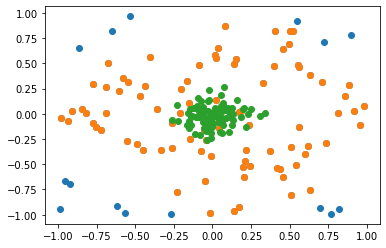

3.4


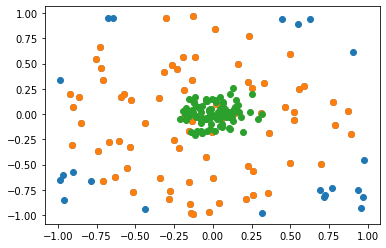

3.12


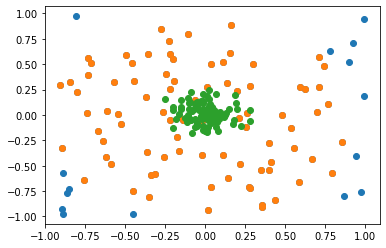

3.4
Drei Monte-Carlo-Simulationen mit zusätzlicher Normalverteilung zur Bestimmung von π mit 1000 Zufallsstichproben


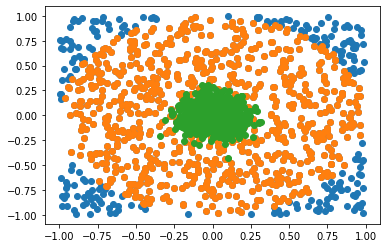

3.12


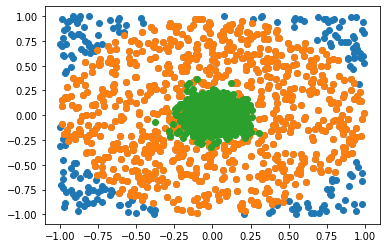

3.212


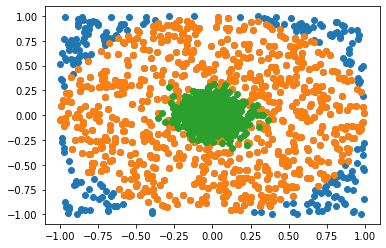

3.084
Drei Monte-Carlo-Simulationen mit zusätzlicher Normalverteilung zur Bestimmung von π mit 10000 Zufallsstichproben


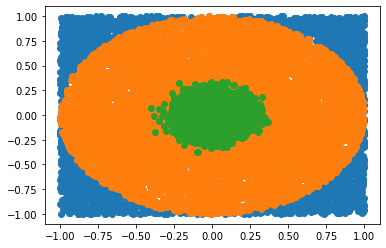

3.1296


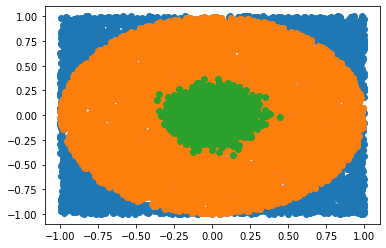

3.1456


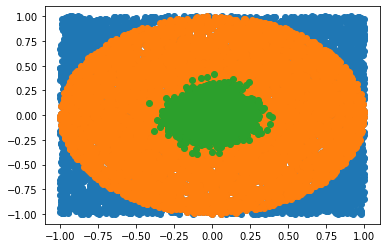

3.1592


In [9]:
# Aufgabe c)
print(f'Drei Monte-Carlo-Simulationen mit zusätzlicher Normalverteilung zur Bestimmung von π mit {100} Zufallsstichproben')
two_player_1_1 = mc_sim(n = 100, r = 1, func = "pi", norm = [0, 0.1])
two_player_1_2 = mc_sim(n = 100, r = 1, func = "pi", norm = [0, 0.1])
two_player_1_3 = mc_sim(n = 100, r = 1, func = "pi", norm = [0, 0.1])

print(f'Drei Monte-Carlo-Simulationen mit zusätzlicher Normalverteilung zur Bestimmung von π mit {1000} Zufallsstichproben')
two_player_2_1 = mc_sim(n = 1000, r = 1, func = "pi", norm = [0, 0.1])
two_player_2_2 = mc_sim(n = 1000, r = 1, func = "pi", norm = [0, 0.1])
two_player_2_3 = mc_sim(n = 1000, r = 1, func = "pi", norm = [0, 0.1])

print(f'Drei Monte-Carlo-Simulationen mit zusätzlicher Normalverteilung zur Bestimmung von π mit {10000} Zufallsstichproben')
two_player_3_1 = mc_sim(n = 10000, r = 1, func = "pi", norm = [0, 0.1])
two_player_3_2 = mc_sim(n = 10000, r = 1, func = "pi", norm = [0, 0.1])
two_player_3_3 = mc_sim(n = 10000, r = 1, func = "pi", norm = [0, 0.1])

### Welchem Sachverhalt entspricht diese Simulation?
Abgeändert aus Versuchsanleitung 1.2.2.4: <br>
Man stelle sich vor, ein Dartspieler ist sehr schlecht und trifft die Wand mit einer homgenen Wahrscheinlichkeit (das wurde bis jetzt benutzt). <br>
Dieser Spieler wurde in Aufgabenteil a) und b) verwendet und mit seiner Hilfe ein Wert für $\large{\pi}$ berechnet. <br>
Der nun in diesem Aufgabenteil hinzugefügte zweite Spieler ist sehr gut und die Wahrscheinlichkeit, <br>
dass er mit seinem Dartpfeil einen gewissen Abstand vom gewünschtes Ziel hat, folgt einer Gaußkurve. <br>
Leider werfen die beiden Spieler auf das gleiche Brett, so dass man keine reine Verteilung der beiden Spieler erhält, <br>
sondern eine Überlagerung dieser Häufigkeitsverteilungen. <br>
(Beide Spieler werfen, sofern wir den Code richtig gelesen haben gleich oft, nicht wie in 1.2.2.4 behauptet, dass der komplett zufällige Spieler öfter wirft.) <br>
Wie wir aus den der Funktion $mc\_sim$ entnehmen können, spezifiziert der übergebene Parameter "norm = [0, 0.1]" die Parameter des zweiten Spielers. <br>
Diese Werte werden zum generieren der normalverteilten Werte des zweiten Spielers mit Hilfe der Funktion $numpy.random.normal$ verwendet. <br>
Mit der offiziellen Dokumentation auf numpy.org sehen, wir das der zweite Spieler auf $loc = 0$ (Erwartungswert) auf den Mittelpunkt "zielt". <br>
Die Standardabweichung wird hier mit dem $scale = 0.1$ Parameter übergeben.

### Könnte $\large{\pi}$ nur aus den Ergebnissen dieses Spielers berechnet werden?
Ja, aus den Ergebnissen dieses Spieler lässt sich $\pi$ berechnen. <br>
Wir betrachten nur die x- oder y-Werte der Würfe des normalverteilt werfenden Spielers. (Weiterhin nur x-Koordinaten) <br>
Die x-Koordinaten sind normalverteilt, hierraus berechnen wir nun Erwartungswert und Standardabweichung. (In die Simulation eingegeben mit dem norm Parameter). <br>
Nun plotten wir die Daten in ein Histogramm und lesen am Erwartungswert den Funktionswert der Gaussfunktion ab. <br>
Nun haben wir alle Werte. Wir setzen unseren Wert mit der Gaußfunktion gleich und Formen nach $\large{\pi}$ um:

### Umformungen
$ f(x | \mu, \sigma) = \frac{ 1 }{ \sqrt{2 \pi \sigma^2 } } \cdot e^{ - \frac{ {(x - \mu)}^2 }{ 2 \sigma^2 } } $ <br>
$ \sqrt{2 \pi \sigma^2 } \cdot f(x | \mu, \sigma) =  e^{ - \frac{ {(x - \mu)}^2 }{ 2 \sigma^2 } } $ <br>
$ \sqrt{2 \pi \sigma^2 } = \frac{ e^{ - \frac{ {(x - \mu)}^2 }{ 2 \sigma^2 } } }{ f(x | \mu, \sigma) } $ <br>
<br>
$ 2 \pi \sigma^2 = { \left( \frac{ e^{ - \frac{ {(x - \mu)}^2 }{ 2 \sigma^2 } } }{ f(x | \mu, \sigma) } \right) }^2 $ <br>
$ \pi = { \left( \frac{ e^{ - \frac{ {(x - \mu)}^2 }{ 2 \sigma^2 } } }{ f(x | \mu, \sigma) } \right) }^2 \cdot \frac{1}{2 \sigma^2}$ <br>


In [10]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus (c)
# Anleitung: siehe (a)
# Redundant. mc_sim Ausgaben unterscheiden sich nicht zu (a)

In [11]:
# Berechnen Sie die empirische Standardabweichung für Ihre Ergebnisse aus (c)
# Anleitung: siehe (a)
# Redundant. mc_sim Ausgaben unterscheiden sich nicht zu (a)

Wir führen die Simulation mit Mittelwert mu=4 und Standardabweichung sigma=0.01. Wir verwenden 10000 Zufallsstichproben.
Aus dem Datensatz berechnen wir den Mittelwert auf 4.00004806025789 und die Standardabweichung auf 0.009989331868185078


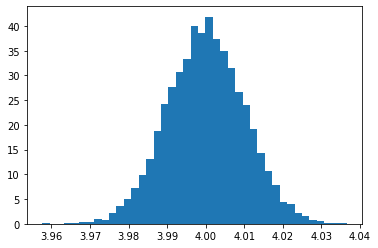

Gaußfunktion am Erwartungswert: 39.894228040143275
Experimenteller Wert beim Erwartungswert: 39.95319149480377
Wir berechen π auf 3.1390206117418775. Das ist eine Abweichung vom Literaturwert von 0.0819 %


In [82]:
# Simulations Parameter
n = 10000
sigma = 0.01
mu = 4
x = mu

print(f'Wir führen die Simulation mit Mittelwert {mu=} und Standardabweichung {sigma=}. Wir verwenden {n} Zufallsstichproben.')

# Wir erzeugen eine Normalverteilung der x-Werte der Dartpfeile des Spielers
verteilung = np.array([rnd.normal(mu, sigma) for i in range(n)])

# Da wir die Simulationsparameter eigentlich nicht kennen berechnen wir sie hier aus dem Datensatz:
exp_sigma = abs(np.std(verteilung))
exp_mu = abs(np.mean(verteilung))
print(f'Aus dem Datensatz berechnen wir den Mittelwert auf {exp_mu} und die Standardabweichung auf {exp_sigma}')

# Erzeugen des Histogramms
bin_count = 41 # ungerade
histogram = plt.hist(verteilung, bins=bin_count, density=True)
plt.show()

# Theoretischer Wert der Gaußfunktion am Erwartungswert
theo = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
print(f'Gaußfunktion am Erwartungswert: {theo}')

# Experimentell bestimmter Wert der Gaußfunktion am Erwartungswert
exp = histogram[0][int(bin_count/2)]
print(f'Experimenteller Wert beim Erwartungswert: {exp}')

# Die oben umgeformte Funktion
def gauss_pi(mu, sigma, x, exp):
    return ( math.exp(- (x - mu)**2 / (2 * sigma**2 ) ) / exp )**2 * 1/(2 * sigma**2)

# Einsetzen in die oben umgeformte Funktion
normal_pi = gauss_pi(exp_mu, exp_sigma, exp_mu, exp)

abw_normal_pi = abs( normal_pi / np.pi - 1 ) * 100
print(f'Wir berechen π auf {normal_pi}. Das ist eine Abweichung vom Literaturwert von {abw_normal_pi:.4f} %')



### Sollte man Pi nur anhand der Ergebnisse dieses Spielers bestimmen?
Klar, warum nicht. Das hier skizzierte Verfahren hat mit unter einen sehr großen Fehler, dieser ließe sich aber mit mehr samplen am Plot noch deutlich senken.

# Aufgabe d)

Drei Monte-Carlo-Integrationen der Funktion e^(-x^2/2) zur Bestimmung von π mit 100 Zufallsstichproben


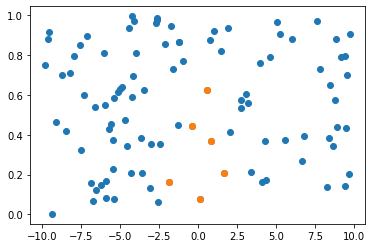

1.2


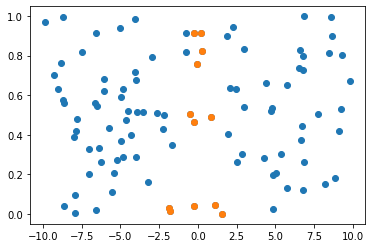

2.4


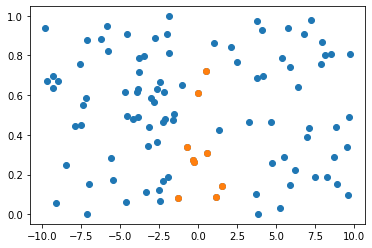

1.7999999999999998
Drei Monte-Carlo-Integrationen der Funktion e^(-x^2/2) zur Bestimmung von π mit 1000 Zufallsstichproben


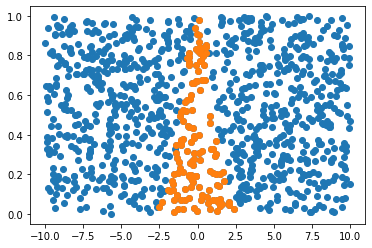

2.6


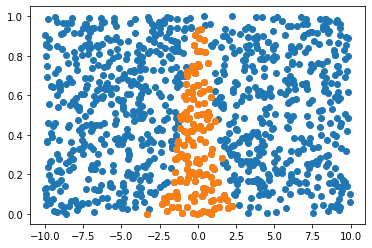

2.96


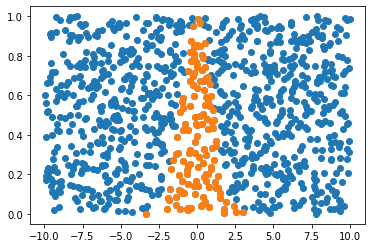

2.6
Drei Monte-Carlo-Integrationen der Funktion e^(-x^2/2) zur Bestimmung von π mit 10000 Zufallsstichproben


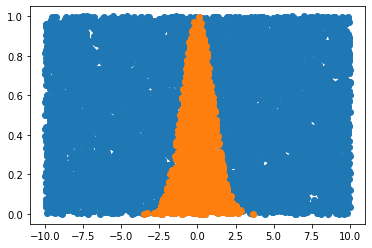

2.556


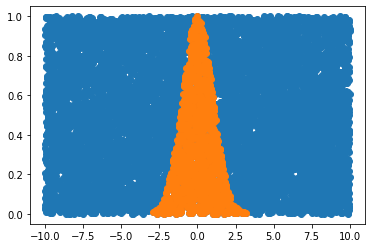

2.4859999999999998


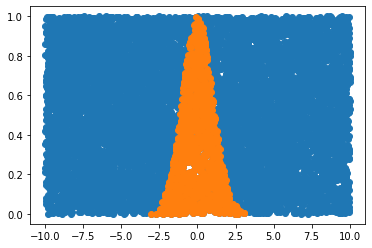

2.5119999999999996
Literaturwert: 2.5066282746310002


In [21]:
print(f'Drei Monte-Carlo-Integrationen der Funktion e^(-x^2/2) zur Bestimmung von π mit {100} Zufallsstichproben')
integral_1_1 = mc_sim(n = 100, r = 10, func = "gauss", norm = False)
integral_1_2 = mc_sim(n = 100, r = 10, func = "gauss", norm = False)
integral_1_3 = mc_sim(n = 100, r = 10, func = "gauss", norm = False)

print(f'Drei Monte-Carlo-Integrationen der Funktion e^(-x^2/2) zur Bestimmung von π mit {1000} Zufallsstichproben')
integral_2_1 = mc_sim(n = 1000, r = 10, func = "gauss", norm = False)
integral_2_2 = mc_sim(n = 1000, r = 10, func = "gauss", norm = False)
integral_2_3 = mc_sim(n = 1000, r = 10, func = "gauss", norm = False)

print(f'Drei Monte-Carlo-Integrationen der Funktion e^(-x^2/2) zur Bestimmung von π mit {10000} Zufallsstichproben')
integral_3_1 = mc_sim(n = 10000, r = 10, func = "gauss", norm = False)
integral_3_2 = mc_sim(n = 10000, r = 10, func = "gauss", norm = False)
integral_3_3 = mc_sim(n = 10000, r = 10, func = "gauss", norm = False)

print("Literaturwert:", np.sqrt(np.pi * 2))

Wir berechnen die Mittelwerte der drei Versuchsdurchführungen und vergleichen mit dem Literaturwert. <br>
Wie wir dem Wikipedia-Artikel über die Normalverteilung entnehmen können liegt der 1733 von Abraham de Moivre exakt berechnet Wert dieses Integrals bei $\sqrt{2 \pi}$

In [22]:
# Mittelwerte berechnen und Prozentabweichungen
mw_int_1 = ( integral_1_1 + integral_1_2 + integral_1_3 ) / 3
mw_int_2 = ( integral_2_1 + integral_2_2 + integral_2_3 ) / 3
mw_int_3 = ( integral_3_1 + integral_3_2 + integral_3_3 ) / 3

abw_int1 = abs( mw_int_1 / np.sqrt(np.pi * 2) - 1 ) * 100
abw_int2 = abs( mw_int_2 / np.sqrt(np.pi * 2) - 1 ) * 100
abw_int3 = abs( mw_int_3 / np.sqrt(np.pi * 2) - 1 ) * 100

# TODO: Mittelwerte und noch mit ausgeben

print(f'Wir vergleichen die Ergebnisse unserer Monte-Carlo-Integration mit dem theoretischen Wert des Integrals')
print(f'Für {100}   Zufallsstichproben weicht der Wert um {abw_int1:.4f} % vom Literaturwert ab.')
print(f'Für {1000}  Zufallsstichproben weicht der Wert um {abw_int2:.4f} % vom Literaturwert ab.')
print(f'Für {10000} Zufallsstichproben weicht der Wert um {abw_int3:.4f} % vom Literaturwert ab.')

Wir vergleichen die Ergebnisse unserer Monte-Carlo-Integration mit dem theoretischen Wert des Integrals
Für 100   Zufallsstichproben weicht der Wert um 28.1904 % vom Literaturwert ab.
Für 1000  Zufallsstichproben weicht der Wert um 8.5123 % vom Literaturwert ab.
Für 10000 Zufallsstichproben weicht der Wert um 0.4537 % vom Literaturwert ab.


# Aufgabe e)
Da wir die Lösung des hier experimentell genährten Integrals $ \int_{-\infty}^{\infty} e^{ -\frac{1}{2} t^2} \, dt = \sqrt{2 \pi} $ bereits kennen,
können wir die Formel nach $\large{\pi}$ umstellen. Wir erhalten: <br>
$ \pi = \frac{ { \left( \int_{-\infty}^{\infty} e^{ -\frac{1}{2} t^2} \, dt \right) }^2 }{2} $. <br>
Den Wert des Integrals haben wir mit der Funktion $mc\_sim$ bereits experimentell bestimmt. <br>
Wir setzen also unsere drei Mittelwerte ein, und bestimmen damit Werte für $\large{\pi}$.

In [23]:
pi_1 = ( mw_int_1 )**2 / 2
pi_2 = ( mw_int_2 )**2 / 2
pi_3 = ( mw_int_3 )**2 / 2

abw_pi1 = abs( pi_1 / np.pi - 1 ) * 100
abw_pi2 = abs( pi_2 / np.pi - 1 ) * 100
abw_pi3 = abs( pi_3 / np.pi - 1 ) * 100

print(f'Wir rechnen die Mittelwerte der Integralflächen um, zu Approximationen von π')
print(f'Für {100}   Zufallsstichproben berechnen wir den Wert von π auf {pi_1:.4f}')
print(f'Für {1000}  Zufallsstichproben berechnen wir den Wert von π auf {pi_2:.4f}')
print(f'Für {10000} Zufallsstichproben berechnen wir den Wert von π auf {pi_3:.4f}')
print(f'Abweichung vom Literaturwert')
print(f'Für {100}   Zufallsstichproben weicht der Wert um {abw_pi1:.4f} % vom Literaturwert für π ab.')
print(f'Für {1000}  Zufallsstichproben weicht der Wert um {abw_pi2:.4f} % vom Literaturwert für π ab.')
print(f'Für {10000} Zufallsstichproben weicht der Wert um {abw_pi3:.4f} % vom Literaturwert für π ab.') 


Wir rechnen die Mittelwerte der Integralflächen um, zu Approximationen von π
Für 100   Zufallsstichproben berechnen wir den Wert von π auf 1.6200
Für 1000  Zufallsstichproben berechnen wir den Wert von π auf 3.6992
Für 10000 Zufallsstichproben berechnen wir den Wert von π auf 3.1702
Abweichung vom Literaturwert
Für 100   Zufallsstichproben weicht der Wert um 48.4338 % vom Literaturwert für π ab.
Für 1000  Zufallsstichproben weicht der Wert um 17.7492 % vom Literaturwert für π ab.
Für 10000 Zufallsstichproben weicht der Wert um 0.9094 % vom Literaturwert für π ab.


Wie man an den Ergebnissen unschwer erkennen kann, ist diese Approximation deutlich schlechter, als die in Aufgabenteil a).

#### Was passiert, wenn man die Intervallgrenzen der Monte-Carlo-Integration ändert? Wie kann man die Ergebnisse erklären? <br>
Das Ergebnis wird, wie im Beispiel unten gezeigt trotz größerer Anzahl an Stichproben ungenauer. <br>
Die notwendige Anzahl an Zufallsstichproben wächst mit steigendem Radius extrem schnell an. <br>
Erhöht man den Wert für den Radius, so wächst die Fläche, auf der die Stichproben genommen werden mit $ (2 \cdot x) \cdot 1$ an ($x$ hierbei die Erhöhung des Radius). <br>
Die Anzahl an Stichproben muss also so stark wachsen, da die betrachtete Fläche so viel größer wird. <br>
Da die Gaußfunktion jedoch sehr schnell an ihren Rändern gegen Null strebt (ihr Grenzwert für $-\infty$, sowie $\infty$ ist Null), <br>
verbessert ein größerer Radius die Genauigkeit des Ergebnisses ab einem gewissen Punkt faktisch nicht mehr.

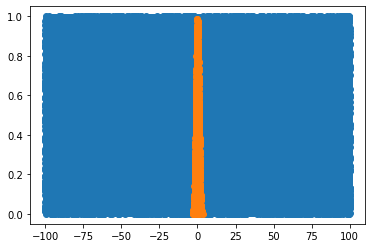

2.574
Diese genauere Simulation bestimmt π auf 3.3127379999999995, das ist eine Abweichung vom Literaturwert von 5.447725573671813 %.


In [24]:
int_radius = mc_sim(n = 100000, r = 100, func = "gauss", norm = False)
pi_radius = ( int_radius )**2 / 2
abw_pi_radius = abs( pi_radius / np.pi - 1 ) * 100

print(f'Diese genauere Simulation bestimmt π auf {pi_radius}, das ist eine Abweichung vom Literaturwert von {abw_pi_radius} %.')

# Abschlussfeier

Drei Abschlussfeier-Simulationen mit 1000 "Damen" und 100 "Herren"


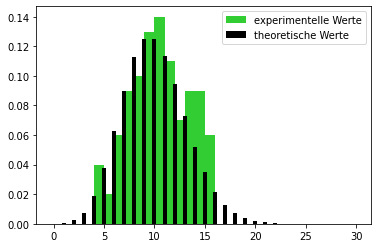

Häufigkeitswerte (y-Werte des Histogramms):  [0.   0.   0.   0.   0.04 0.02 0.06 0.09 0.1  0.13 0.14 0.11 0.07 0.09
 0.09 0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


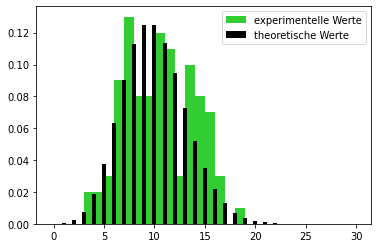

Häufigkeitswerte (y-Werte des Histogramms):  [0.   0.   0.   0.02 0.02 0.03 0.09 0.13 0.08 0.08 0.12 0.11 0.03 0.1
 0.08 0.07 0.03 0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


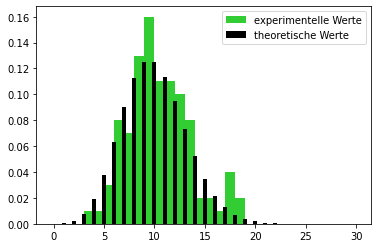

Häufigkeitswerte (y-Werte des Histogramms):  [0.   0.   0.   0.01 0.01 0.03 0.08 0.07 0.13 0.16 0.11 0.11 0.1  0.08
 0.02 0.02 0.01 0.04 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]
Drei Abschlussfeier-Simulationen mit 2500 "Damen" und 2500 "Herren"


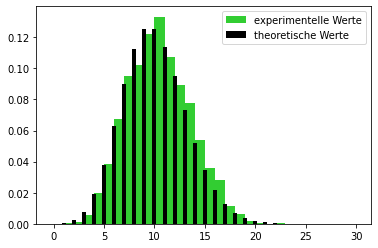

Häufigkeitswerte (y-Werte des Histogramms):  [0.     0.0004 0.0012 0.0056 0.02   0.0384 0.0676 0.0952 0.102  0.1224
 0.1332 0.1076 0.0892 0.078  0.054  0.036  0.0284 0.0112 0.0064 0.002
 0.0008 0.     0.0004 0.     0.     0.     0.     0.     0.     0.    ]


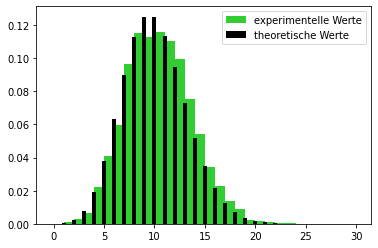

Häufigkeitswerte (y-Werte des Histogramms):  [0.     0.0008 0.0032 0.0068 0.0224 0.0412 0.0596 0.0964 0.1152 0.1128
 0.1156 0.1104 0.0996 0.0756 0.0544 0.0344 0.0228 0.014  0.0092 0.002
 0.0016 0.0012 0.0004 0.0004 0.     0.     0.     0.     0.     0.    ]


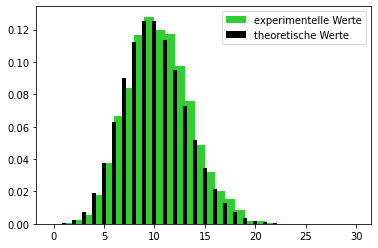

Häufigkeitswerte (y-Werte des Histogramms):  [0.     0.0004 0.0024 0.0056 0.018  0.0376 0.0668 0.084  0.1168 0.128
 0.12   0.1172 0.0976 0.076  0.0484 0.032  0.0204 0.0156 0.0088 0.002
 0.0016 0.0008 0.     0.     0.     0.     0.     0.     0.     0.    ]
Drei Abschlussfeier-Simulationen mit 100000 "Damen" und 10000 "Herren"


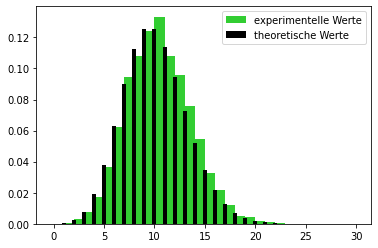

Häufigkeitswerte (y-Werte des Histogramms):  [0.000e+00 4.000e-04 3.100e-03 7.300e-03 1.710e-02 3.640e-02 6.230e-02
 9.480e-02 1.078e-01 1.241e-01 1.333e-01 1.080e-01 9.560e-02 7.610e-02
 5.470e-02 3.280e-02 2.150e-02 1.230e-02 5.000e-03 4.100e-03 1.800e-03
 1.200e-03 2.000e-04 0.000e+00 0.000e+00 1.000e-04 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]


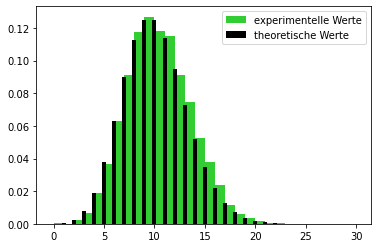

Häufigkeitswerte (y-Werte des Histogramms):  [2.000e-04 1.000e-04 2.300e-03 6.800e-03 1.910e-02 3.670e-02 6.270e-02
 9.090e-02 1.178e-01 1.269e-01 1.181e-01 1.149e-01 9.100e-02 7.450e-02
 5.270e-02 3.760e-02 2.360e-02 1.160e-02 6.200e-03 3.500e-03 1.600e-03
 7.000e-04 4.000e-04 0.000e+00 1.000e-04 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]


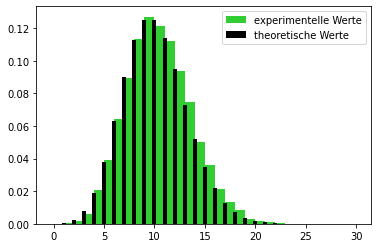

Häufigkeitswerte (y-Werte des Histogramms):  [0.000e+00 4.000e-04 1.800e-03 6.200e-03 2.060e-02 3.910e-02 6.450e-02
 8.920e-02 1.135e-01 1.270e-01 1.212e-01 1.123e-01 9.370e-02 7.470e-02
 5.020e-02 3.580e-02 2.110e-02 1.330e-02 8.500e-03 3.000e-03 2.000e-03
 1.200e-03 6.000e-04 0.000e+00 1.000e-04 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]


In [4]:
#Aufgabe f) i)
print(f'Drei Abschlussfeier-Simulationen mit {1000} "Damen" und {10**2} "Herren"')
party_1_1 = mc_sim(n = 1000, r = 10, func="grid", norm = False)
party_1_2 = mc_sim(n = 1000, r = 10, func="grid", norm = False)
party_1_3 = mc_sim(n = 1000, r = 10, func="grid", norm = False)

print(f'Drei Abschlussfeier-Simulationen mit {2500} "Damen" und {50**2} "Herren"')
party_2_1 = mc_sim(n = 25000, r = 50, func = "grid", norm = False)
party_2_2 = mc_sim(n = 25000, r = 50, func = "grid", norm = False)
party_2_3 = mc_sim(n = 25000, r = 50, func = "grid", norm = False)

print(f'Drei Abschlussfeier-Simulationen mit {100000} "Damen" und {100**2} "Herren"')
party_3_1 = mc_sim(n = 100000, r = 100, func="grid", norm = False)
party_3_2 = mc_sim(n = 100000, r = 100, func="grid", norm = False)
party_3_3 = mc_sim(n = 100000, r = 100, func="grid", norm = False)

#Denken Sie bitte daran, alles 3x auszuführen und die Ergebnisse zu dokumentieren

In [44]:
# Ich bin zu cool zum ablesen, (⌐▨_▨) Hackerman
# Abgelesene Werte sind hier direkt aus dem Datensatz "abgelesen" :)
print(f'Ihre abgelesenen Werte bei...')

i_1 = party_1_1[0][3]
i_2 = party_1_2[0][3]
i_3 = party_1_3[0][3]
print(f'(f)(i)   P("1 Herr, 3 Damen") = {i_1}, {i_2}, {i_3}')

ii_1 = party_2_1[0][3]
ii_2 = party_2_2[0][3]
ii_3 = party_2_3[0][3]
print(f'(f)(ii)  P("1 Herr, 3 Damen") = {ii_1}, {ii_2}, {ii_3}')

iii_1 = party_3_1[0][3]
iii_2 = party_3_2[0][3]
iii_3 = party_3_3[0][3]
print(f'(f)(iii) P("1 Herr, 3 Damen") = {iii_1}, {iii_2}, {iii_3}')

Ihre abgelesenen Werte bei...
(f)(i)   P("1 Herr, 3 Damen") = 0.0, 0.0, 0.01
(f)(ii)  P("1 Herr, 3 Damen") = 0.0056, 0.0068, 0.0056
(f)(iii) P("1 Herr, 3 Damen") = 0.0073, 0.0068, 0.0062


In [45]:
# Berechnen Sie jeweils den Mittelwert der drei Messungen für i), ii) und iii) 
mw_i   = ( i_1   + i_2   + i_3   ) / 3
mw_ii  = ( ii_1  + ii_2  + ii_3  ) / 3
mw_iii = ( iii_1 + iii_2 + iii_3 ) / 3
print(f'Der Mittelwert für (i)   ist {mw_i:.4f}')
print(f'Der Mittelwert für (ii)  ist {mw_ii:.4f}')
print(f'Der Mittelwert für (iii) ist {mw_iii:.4f}')

Der Mittelwert für (i)   ist 0.0033
Der Mittelwert für (ii)  ist 0.0060
Der Mittelwert für (iii) ist 0.0068


In [46]:

s_i   = np.sqrt( (1/2) * ( ( i_1   - mw_i   )**2 + ( i_2   - mw_i   )**2 + ( i_3   - mw_i   )**2 ) )
s_ii  = np.sqrt( (1/2) * ( ( ii_1  - mw_ii  )**2 + ( ii_2  - mw_ii  )**2 + ( ii_3  - mw_ii  )**2 ) )
s_iii = np.sqrt( (1/2) * ( ( iii_1 - mw_iii )**2 + ( iii_2 - mw_iii )**2 + ( iii_3 - mw_iii )**2 ) )
# Notieren Sie hier die empirischen Standarabweichungen
print(f'Empirische Standardabweichung i)   {s_i:.5f}')
print(f'Empirische Standardabweichung ii)  {s_ii:.5f}')
print(f'Empirische Standardabweichung iii) {s_iii:.5f}')

Empirische Standardabweichung i)   0.00577
Empirische Standardabweichung ii)  0.00069
Empirische Standardabweichung iii) 0.00055


#### Welche Bedeutung hat r in Bezug auf die Aufgabe?
$r^2$ ist die Anzahl der Herren. Man könnte sich vorstellen, dass die Stühle für die "Herren", neben der Tanzfläche in einem Quadarat aufgestellt sind. <br>
Auf der anderen Seite der Tanzfläche nehmen wir Couchsessel für die "Damen" an. $r$ ist hier die Seitenlänge (Anzahl Stühle) des Herrenquadrats. <br>
Anzumerken ist hier, dass in allen drei Simulationen 10 mal so viele "Damen" wie "Herren" an der Party teilgenommen haben.

#### Vergleichen Sie die erhaltenen Werte mit den theoretischen Werten.
Welcher Verteilung entspricht das resultierende Histogramm der experimentellen Werte? <br>
Das Histogramm der experimentellen Werte nähert eine Normalverteilung. <br>
<br>
Welcher Verteilung entspricht das resultierende Histogramm der theoretischen Werte? <br>
Das Histogramm der theoretischen Werte entspricht einer Normalverteilung. <br>
<br>
Wir bemerken, dass die Normalverteilungen für die drei verschieden Durchführungen sich der gleichen theoretischen Normalverteilung annähern. <br>
Es scheint als ob sich für mehr Partyteilnehmer (wenn das Verhältnis 10:1 gewahrt bleibt) <br>
die experimentelle Verteilung immer mehr der theoretischen Verteilung angleicht.


#### Geben Sie die jeweiligen Parameter der Wahrscheinlichkeitsverteilung an (z.B. "p" oder "a" in den Formeln in der Anleitung). 
Die Wahrscheinlichkeitsverteilung kann wie wir in Aufgabenteil g) verwenden werden mit einer Poissonverteilung beschrieben werden. <br>
Hierfür setzen wir den Parameter $\lambda$ auf 10. <br>
Die Verteilung lässt sich auch als Normalverteilung beschreiben, hierfür rechnen wir aus den experimentellen Werten $\sigma$ und $\mu$ aus:

Experimentell berechneter Mittelwert 9.5, experimentell berechnete Standardabweichung 3.3306756071403893


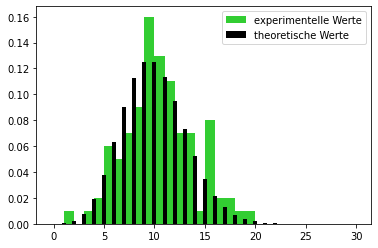

Häufigkeitswerte (y-Werte des Histogramms):  [0.   0.01 0.   0.01 0.02 0.06 0.05 0.07 0.09 0.16 0.13 0.11 0.07 0.07
 0.01 0.08 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


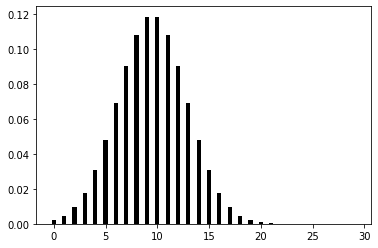

In [73]:
# Addaptiert von Warren Weckesser auf StackOverflow: 50786699
n = party_3_3[0]
bins = party_3_3[1]
mids = 0.5*(bins[1:] + bins[:-1])
mu = np.sum(n * mids)-1
sigma = np.sqrt(np.sum(n * (mids - mu)**2))

print(f'Experimentell berechneter Mittelwert {mu}, experimentell berechnete Standardabweichung {sigma}')

mc_sim(n = 1000, r = 10, func="grid", norm = False)

def gauss(sigma, mu, x):
    return 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)

poisson_dist = np.array([ gauss(sigma = sigma, mu = mu, x = i) for i in range(0, 30)])
plt.bar(np.arange(30), poisson_dist, color = "black", width = 0.4)
plt.show()

# Aufgabe g)
Wie groß ist die Wahrscheinlichkeit, dass drei Damen mit einem Herr tanzen möchten? <br>
Vergleichen Sie diese Werte mit dem theoretischen Wert für $ P(\lambda, k)=\frac{\lambda ^k}{k!}e^{-\lambda}$. <br>
Was fällt Ihnen auf?

Der Erwartungswert der Verteilung ist, da wir 10 mal so viele "Damen" wie "Herren" haben natürlich 10. <br>
Ein "Herr" tanzt im Durchschnitt mit 10 "Damen". <br>
Wir plotten hier außerdem die Poissonfunktion für diesen Versuch, an ihr sind  <br>
Der genauste experimentelle Wert den wir für den berechneten Wert haben ist die Simulation mit 100000 "Damen", <br>
da sich die Simulationen mit mehr Partyteilnehmern dem theoretischen Ergebnis annähern.

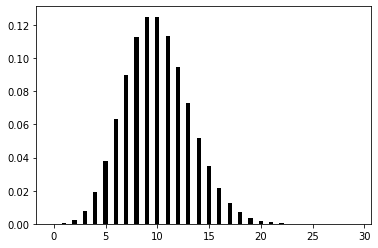

Poisson Ergebnis: 0.007566654960414142
Genauster experimenteller Wert 0.0068. Dieser Wert hat eine Abweichung vom theoretischen von 10.5725 %.
Visueller Vergleich mit Simulation


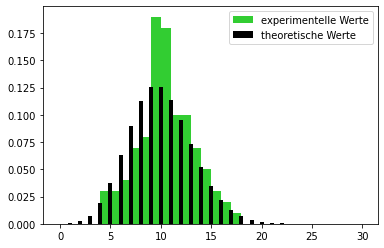

Häufigkeitswerte (y-Werte des Histogramms):  [0.   0.   0.   0.   0.03 0.03 0.04 0.07 0.08 0.19 0.18 0.1  0.1  0.07
 0.05 0.03 0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


(array([0.  , 0.  , 0.  , 0.  , 0.03, 0.03, 0.04, 0.07, 0.08, 0.19, 0.18,
        0.1 , 0.1 , 0.07, 0.05, 0.03, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <BarContainer object of 30 artists>)

In [65]:
# Nun berechnen wir noch den theoretischen Wert quasi wie im Taschenrechner
def poisson(l = 0, k = 0):
    return (l**k) / math.factorial(k) * math.exp(-l)

poisson_dist = np.array([ poisson(l = 10, k = i) for i in range(0, 30)])
plt.bar(np.arange(30), poisson_dist, color = "black", width = 0.4)
plt.show()

abw = abs( mw_iii / poisson(l = 10, k = 3) - 1 ) * 100

print(f'Poisson Ergebnis: {poisson(l = 10, k = 3)}')

print(f'Genauster experimenteller Wert {mw_iii:.4f}. Dieser Wert hat eine Abweichung vom theoretischen von {abw:.4f} %.')
print(f'Visueller Vergleich mit Simulation')
mc_sim(n = 1000, r = 10, func="grid", norm = False)